# **Principal Component Analysis**

As explained in the slides, PCA can be used to perform **Dimensionality Reduction** in datasets. In this colab, we are going to see how to do so and then practice a bit.

## **Imports**

First we import the libraries that we are going to use:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## **Loading the dataset**

In this case we are going to load the dataset directly from an URL.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])




The Iris Dataset is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is a very simple dataset useful to try different things.

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica

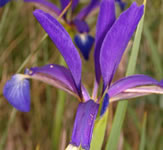


## **Visualizing the data and preparing it for PCA**

Let's see what we have loaded

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


First we are going to standarize the data. We are going to tranform it onto unit scale (mean=0 and variance=1). Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. PCA is one of this algorithms (the IRIS dataset is quite small and this is not so noticiable in it).

You can find a more in-depth explanation [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py). See how in the WINE dataset, the use of standarization before performing the PCA greatly improves the accuracy of the model trained with it.

In [ ]:

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()



,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## **Using PCA**

Now we are going to use PCA to reduce the number of features (dimensions) from 4 to 2. As you can see this is a pretty straightforward process:

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)



,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


Let's add the classes:

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


The results are much more clearer if we plot them:

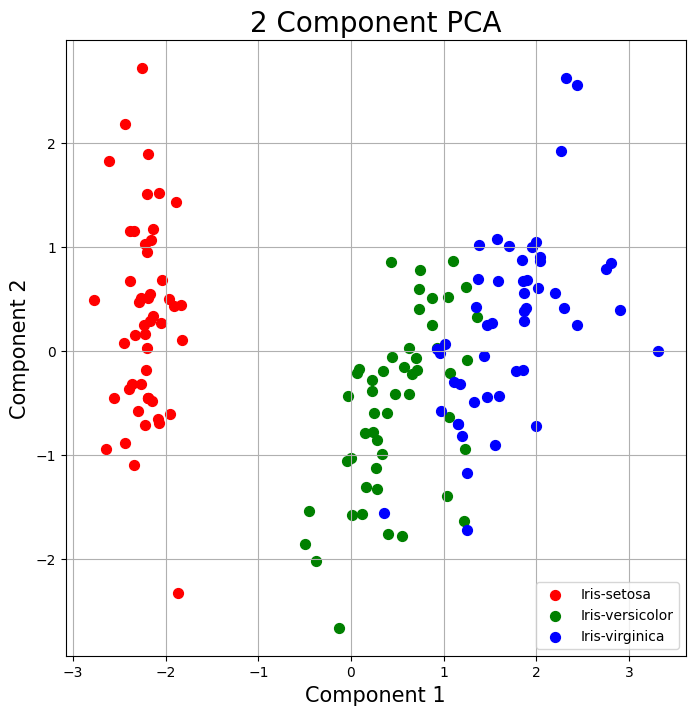

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

As we can see, there is a quite nice separation between the classes even after we have applied the PCA. We have reduced the number of features from 4 to 2, which will allow our models to train faster.

We can even see how much variance (information) is attributed to each component:

In [ ]:
variances = pca.explained_variance_ratio_

variances

array([0.72770452, 0.23030523])

Component 1 has a variance of 72.77% and component 2 of 23.03%. We have lost some information in the process, as these two components don't add for the 100% of the information:

In [ ]:
variances[0] + variances[1]

0.9580097536148197

# **Exercises**



1.   Try the same without standarization. What are the results? Is there any difference?
2.   Try loading and using another dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html). Visualize the results. Are the classes clearly separated? Try it with and without standarization.
3.   Try to normalize some of the variables instead of standarizing them, does it work?

